# **Shahid Ali**
*   FA24-RAI-015
*    Research Paper Link: https://www.al-kindipublisher.com/index.php/bjns/article/view/8009/6792

## Import Libraries


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')



## Data Understanding

*   Dataframe shape
*   Head and Tail
*   Data Types
*   Describe

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [2]:
train = pd.read_csv('/content/Heart_disease_cleveland_new.csv')

In [3]:
train.shape

(303, 14)

In [4]:
train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [5]:
train.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,1
302,38,1,2,138,175,0,0,173,0,0.0,0,0,1,0


In [6]:
# Convert age from days to years
#train['age'] = (train['age'] / 365).astype(int)

In [7]:
train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [8]:
train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
train.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [10]:
train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
train.nunique()

,0
age,41
sex,2
cp,4
trestbps,50
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


In [13]:
train['age'].unique()

array([63, 67, 37, 41, 56, 62, 57, 53, 44, 52, 48, 54, 49, 64, 58, 60, 50,
       66, 43, 40, 69, 59, 42, 55, 61, 65, 71, 51, 46, 45, 39, 68, 47, 34,
       35, 29, 70, 77, 38, 74, 76])

In [14]:
train.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [15]:
train['target'].value_counts()


,count
target,
0,164
1,139


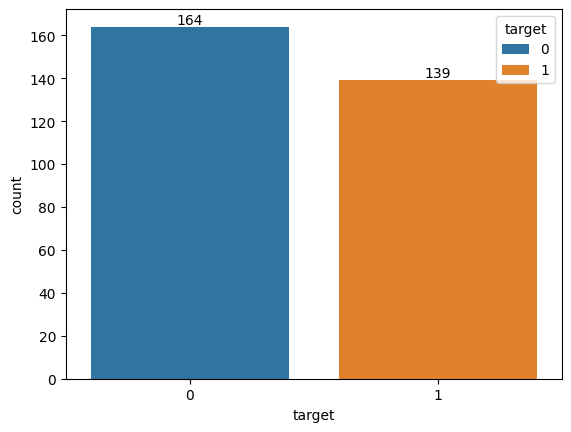

In [16]:
count = sns.countplot(x='target', hue='target', data=train)
for i in count.containers:
  count.bar_label(i)
plt.show()

##Feature Understanding

*   Plotting Feature Distributions

  *   Barchart (Categorical Data)
  *   Histogram (Numerical Data)
  *   Boxplot (Numerical Data)

In [17]:
train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


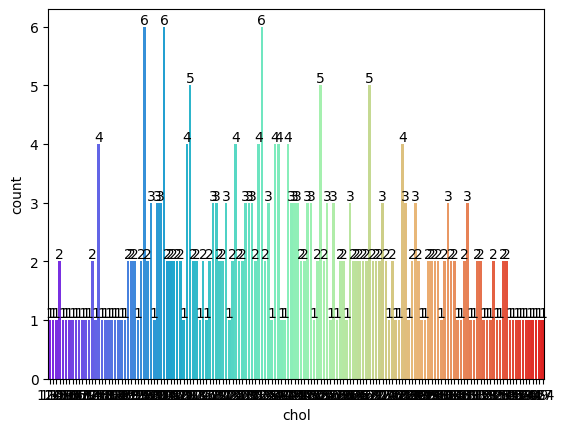

In [18]:
count = sns.countplot(x='chol',data=train,palette='rainbow')
for i in count.containers:
  count.bar_label(i)
plt.show()

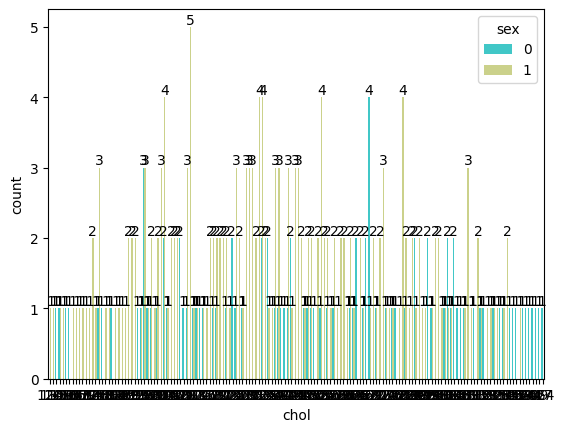

In [19]:
count = sns.countplot(x='chol',hue='sex',data=train,palette='rainbow')
for i in count.containers:
  count.bar_label(i)
plt.show()

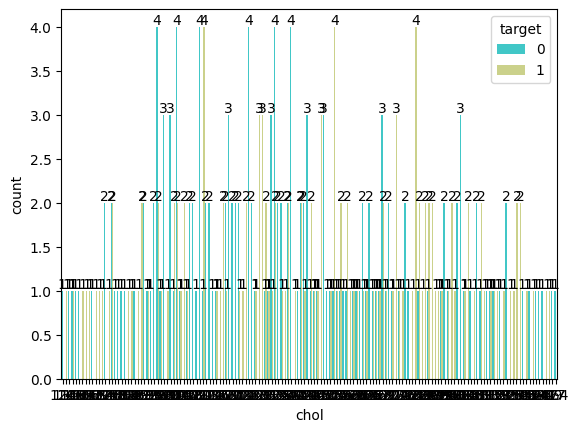

In [20]:

count = sns.countplot(x='chol',hue='target',data=train,palette='rainbow')
for i in count.containers:
  count.bar_label(i)
plt.show()


<Axes: >

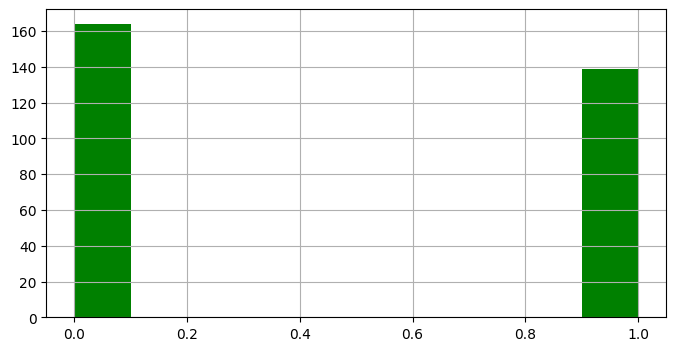

In [21]:
train['target'].hist(color='green', figsize=(8,4))

<Axes: xlabel='age', ylabel='Count'>

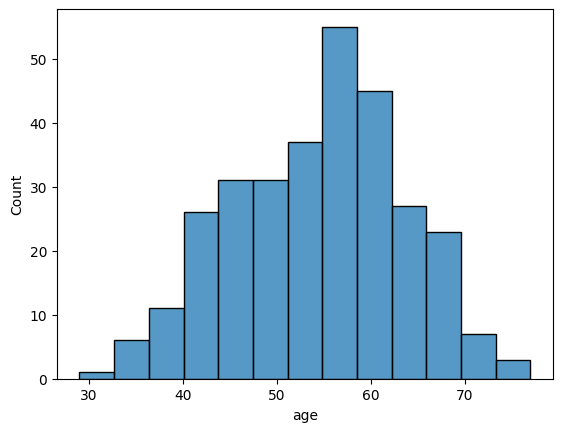

In [22]:
sns.histplot(train['age'])

<Axes: xlabel='target', ylabel='age'>

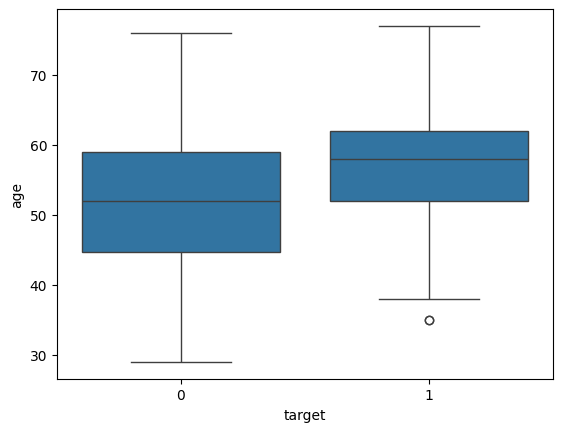

In [23]:
sns.boxplot(y='age', x='target', data=train)

<Axes: xlabel='sex', ylabel='age'>

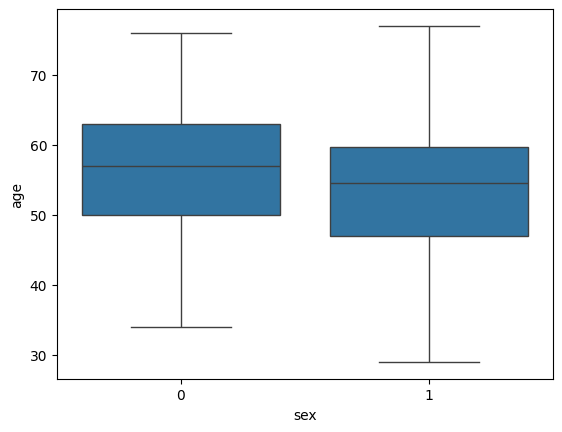

In [24]:
sns.boxplot(y='age', x='sex', data=train)

# **Outlier Removal**

In [25]:
#train = train[train['age'] < 40]




<Axes: xlabel='target', ylabel='age'>

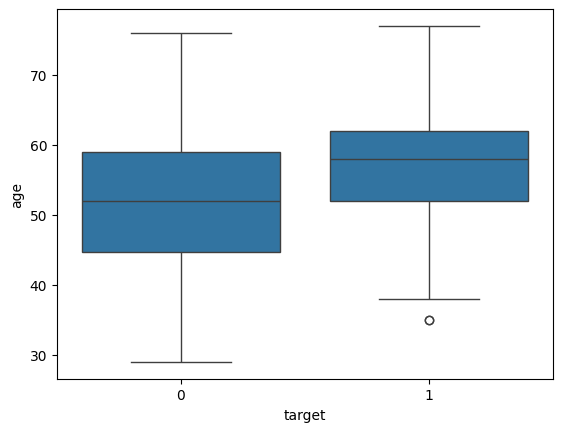

In [26]:
sns.boxplot(y='age', x='target', data=train)

##Data Preparation

*   Dropping irrelevant columns and rows
*   Handling Missing Values
*   Identifying duplicated columns
*   Renaming Columns


Let's begin some exploratory data analysis! We'll start by dropping irrelevant columns

In [27]:
train.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1


In [28]:
#train.drop(['id','height','weight'],axis=1,inplace=True)

In [29]:
train.shape

(303, 14)

In [30]:
train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [31]:
train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


## Data Imputation
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:

In [32]:
train.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


<Axes: >

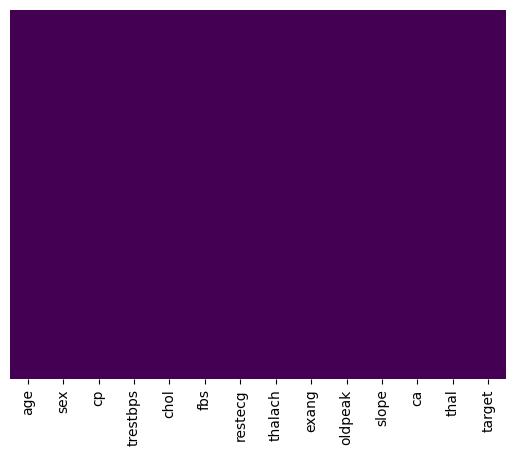

In [33]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [34]:
train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


#Converting Categorical Features


In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [36]:
#sex = pd.get_dummies(train['gender'],dtype=int)

In [37]:
#train.head()

In [38]:
#train = pd.concat([train,sex],axis=1)

In [39]:
#train.head()

In [40]:
#train.drop(['gender'],axis=1,inplace=True)

In [41]:
#train.head()

In [42]:
#train = train.rename(columns={1:'Male'})
#train = train.rename(columns={2:'Female'})

In [43]:
#train.head()

In [44]:
#train.head(2)

In [45]:
#cholesterol	 = pd.get_dummies(train['cholesterol'],dtype=int)

In [46]:
#train = pd.concat([train,cholesterol],axis=1)

In [47]:
#train = train.rename(columns={1:'cholesterol	1',2:'cholesterol	2',3:'cholesterol	3'})

In [48]:
#gluc = pd.get_dummies(train['gluc'],dtype=int)

In [49]:
#train = pd.concat([train,gluc],axis=1)

In [50]:
#train = train.rename(columns={'No':'AlcoholDrinking No','Yes':'AlcoholDrinking Yes'})

In [51]:
#smoke = pd.get_dummies(train['smoke'],dtype=int)

In [52]:
#train = pd.concat([train,smoke],axis=1)

In [53]:
#train = train.rename(columns={0:'smoke No',1:'smoke Yes'})

In [54]:
#train.head()

In [55]:
#alco = pd.get_dummies(train['alco'],dtype=int)

In [56]:
#train = pd.concat([train,alco],axis=1)

In [57]:
#train.head()

In [58]:
#train.head()

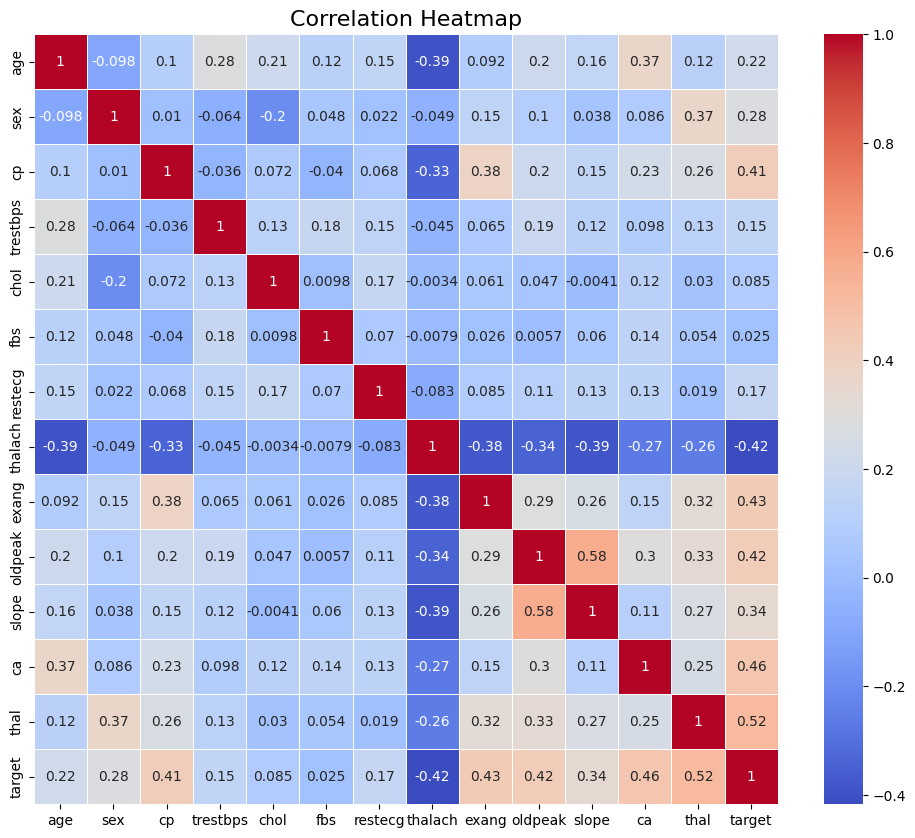

In [59]:
# Correlation Heatmap for All Variables
plt.figure(figsize=(12, 10))
correlation = train.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

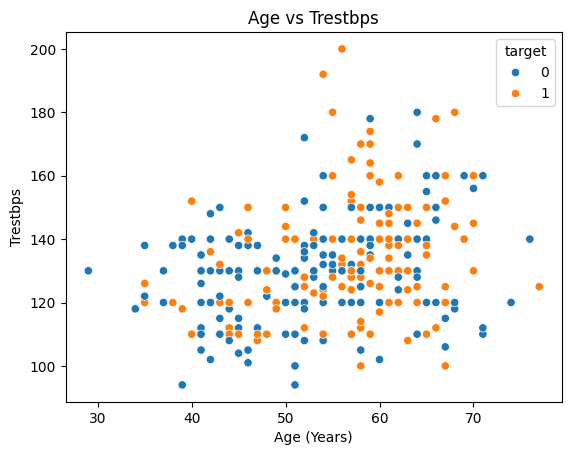

In [60]:
# Scatter plot for age and systolic blood pressure
sns.scatterplot(x= train['age'] , y=train['trestbps'], hue=train['target'])
plt.title("Age vs Trestbps")
plt.xlabel("Age (Years)")
plt.ylabel("Trestbps")
plt.show()

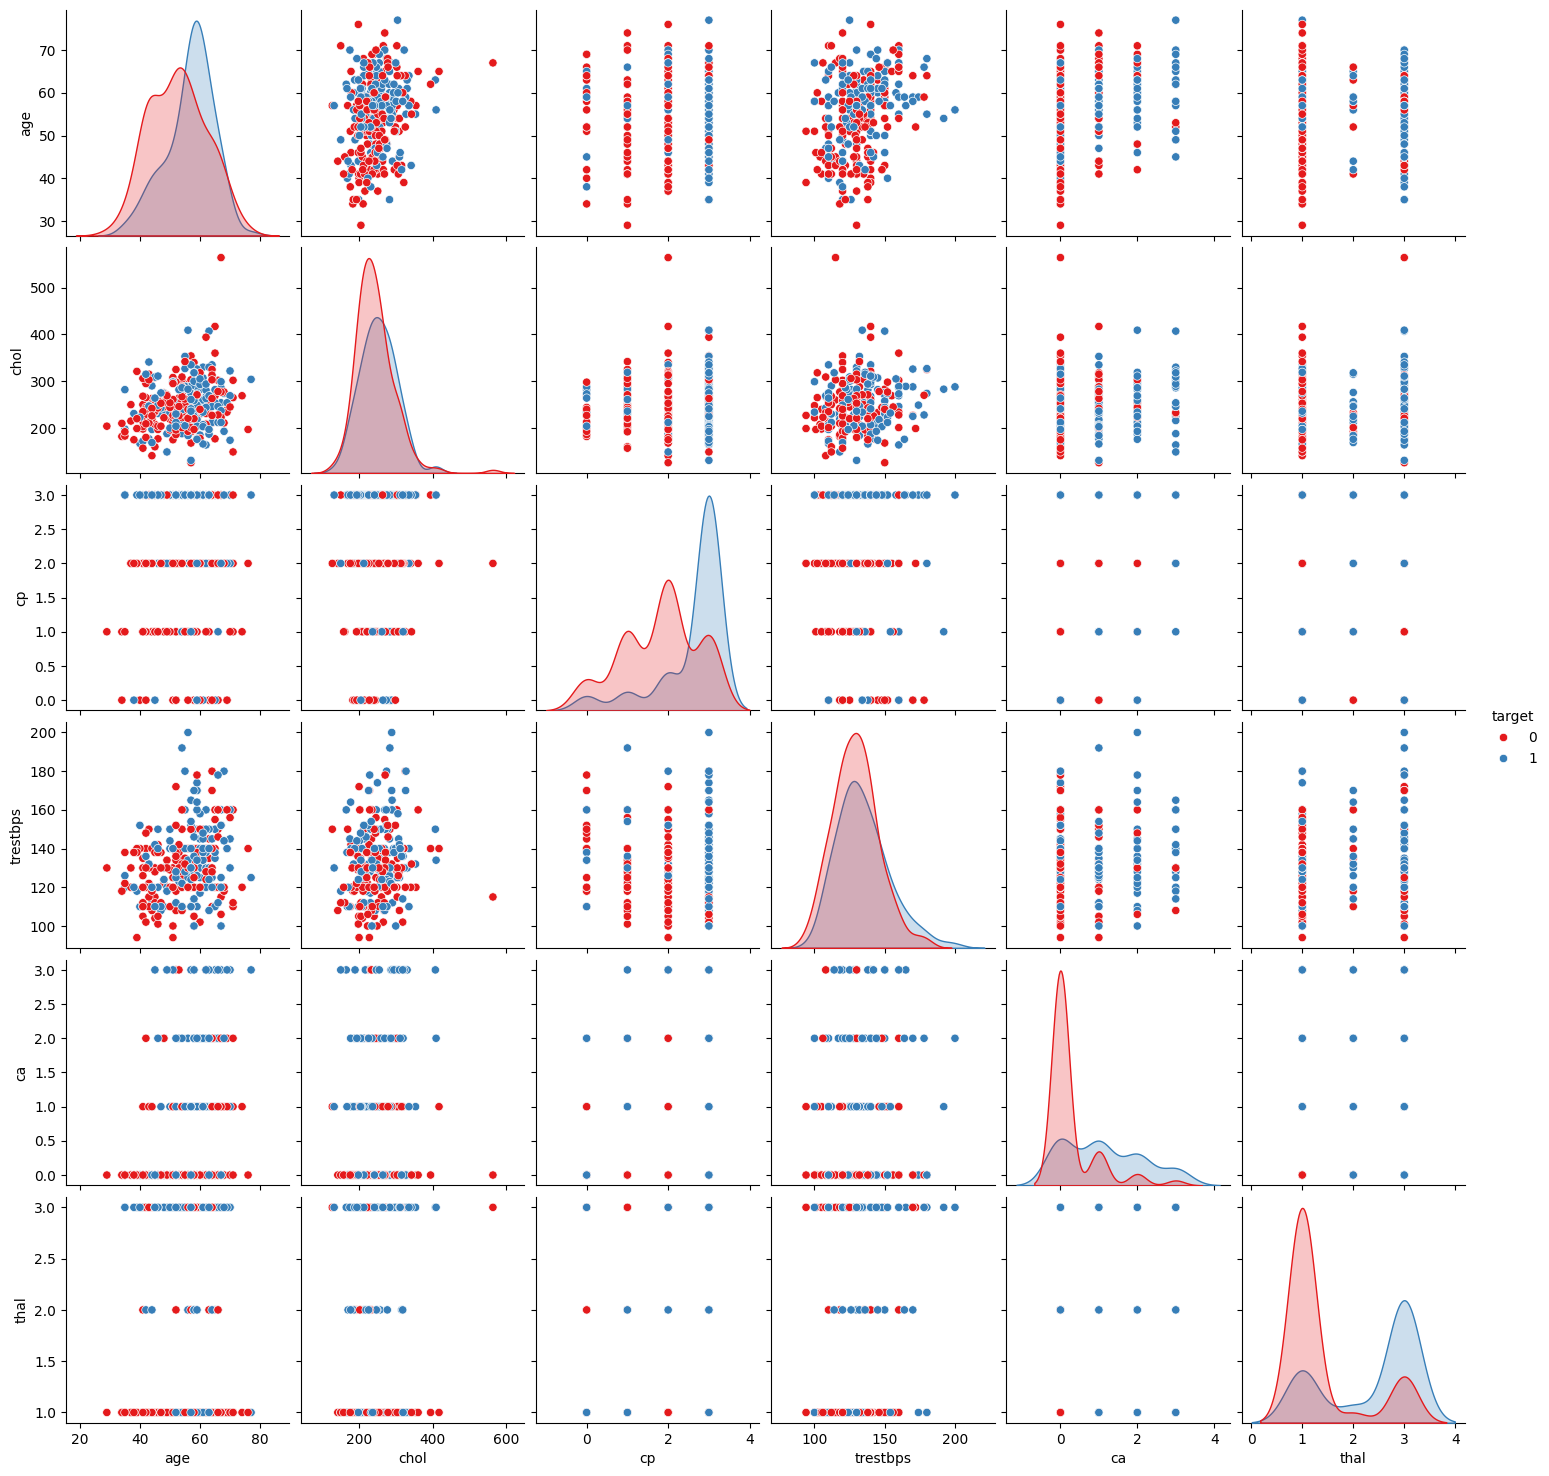

In [61]:
# Pairplot for key variables
sns.pairplot(train[['age', 'chol', 'cp', 'target','trestbps','ca','thal']], hue="target", palette="Set1")
plt.show()

In [63]:
# Custom function for preprocessing
#def custom_preprocessing(X):
 #X = X.copy()
    # Convert 'age' in days to 'age_years'
   # X['age_years'] = X['age']
    # Clip extreme values for blood pressure
    #X['ap_hi'] = np.clip(X['ap_hi'], 90, 200)
    #X['ap_lo'] = np.clip(X['ap_lo'], 60, 120)
    #return X.drop(columns=['age'])  # Drop unnecessary columns

# Create FunctionTransformer
#custom_transformer = FunctionTransformer(custom_preprocessing)

In [ ]:
# Define numerical and categorical features
#numerical_features = ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo']
#categorical_features = ['cholesterol', 'gluc', 'smoke', 'alco', 'active']

# Define ColumnTransformer
#preprocessor = ColumnTransformer(
 #   transformers=[
  #      ('num', Pipeline(steps=[
   #         ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    #        ('scaler', StandardScaler())  # Scale numerical features
     #   ]), numerical_features),
      #  ('cat', OneHotEncoder(), categorical_features)  # One-hot encode categorical features
    #]
#)


In [ ]:
# Full preprocessing pipeline
#pipeline = Pipeline(steps=[
 #   ('custom', custom_transformer),      # Apply custom preprocessing
  #  ('preprocessor', preprocessor)       # Apply ColumnTransformer
#])


In [ ]:


# Apply pipeline
#X = train.drop(columns=['cardio'])  # Features
#y = train['cardio']  # Target variable
#X_preprocessed = pipeline.fit_transform(X)

#print("Preprocessed Data Shape:", X_preprocessed.shape)


In [ ]:
# Handle class imbalance using SMOTE
#smote = SMOTE(random_state=42)
#X_resampled, y_resampled = smote.fit_resample(X_preprocessed, y)

# Check class distribution after SMOTE
#print("\nClass Distribution After SMOTE:")
#print(pd.Series(y_resampled).value_counts())

# Split into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [65]:
X = train.drop(['target'],axis=1)
y = train['target']

Training Logistic Regression...
Logistic Regression:
Accuracy: 0.8689
Confusion Matrix:
[[27  6]
 [ 2 26]]
ROC-AUC: 0.9535
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.81      0.93      0.87        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61





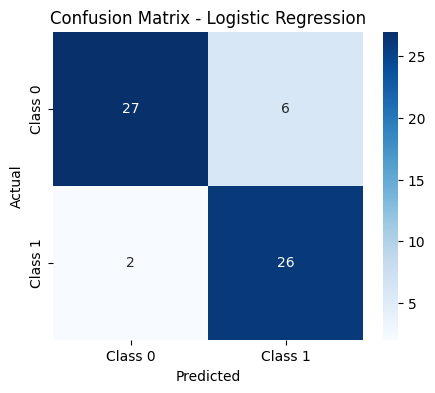

Training Support Vector Classifier...
Support Vector Classifier:
Accuracy: 0.8525
Confusion Matrix:
[[27  6]
 [ 3 25]]
ROC-AUC: 0.9470
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        33
           1       0.81      0.89      0.85        28

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61





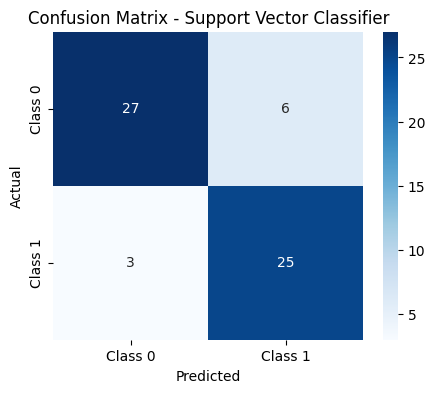

Training Random Forest...
Random Forest:
Accuracy: 0.9016
Confusion Matrix:
[[28  5]
 [ 1 27]]
ROC-AUC: 0.9589
              precision    recall  f1-score   support

           0       0.97      0.85      0.90        33
           1       0.84      0.96      0.90        28

    accuracy                           0.90        61
   macro avg       0.90      0.91      0.90        61
weighted avg       0.91      0.90      0.90        61





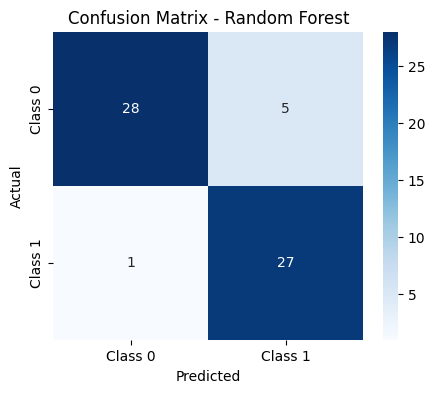

Training Gradient Boosting...
Gradient Boosting:
Accuracy: 0.8525
Confusion Matrix:
[[26  7]
 [ 2 26]]
ROC-AUC: 0.9459
              precision    recall  f1-score   support

           0       0.93      0.79      0.85        33
           1       0.79      0.93      0.85        28

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61





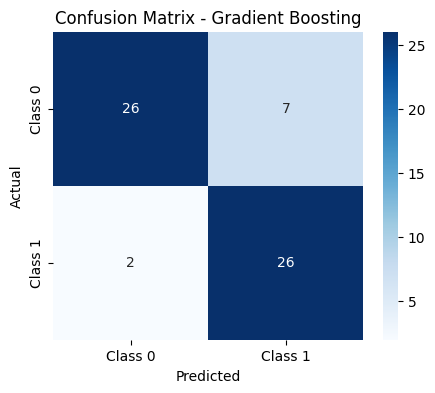

Training Naive Bayes...
Naive Bayes:
Accuracy: 0.8689
Confusion Matrix:
[[26  7]
 [ 1 27]]
ROC-AUC: 0.9491
              precision    recall  f1-score   support

           0       0.96      0.79      0.87        33
           1       0.79      0.96      0.87        28

    accuracy                           0.87        61
   macro avg       0.88      0.88      0.87        61
weighted avg       0.89      0.87      0.87        61





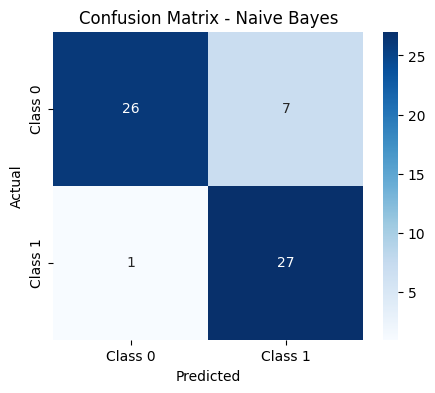

Training K-Nearest Neighbors...
K-Nearest Neighbors:
Accuracy: 0.9016
Confusion Matrix:
[[27  6]
 [ 0 28]]
ROC-AUC: 0.9242
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        33
           1       0.82      1.00      0.90        28

    accuracy                           0.90        61
   macro avg       0.91      0.91      0.90        61
weighted avg       0.92      0.90      0.90        61





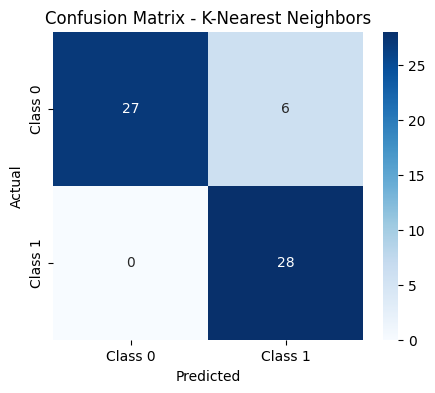

Training Decision Tree...
Decision Tree:
Accuracy: 0.7705
Confusion Matrix:
[[22 11]
 [ 3 25]]
ROC-AUC: 0.7798
              precision    recall  f1-score   support

           0       0.88      0.67      0.76        33
           1       0.69      0.89      0.78        28

    accuracy                           0.77        61
   macro avg       0.79      0.78      0.77        61
weighted avg       0.79      0.77      0.77        61





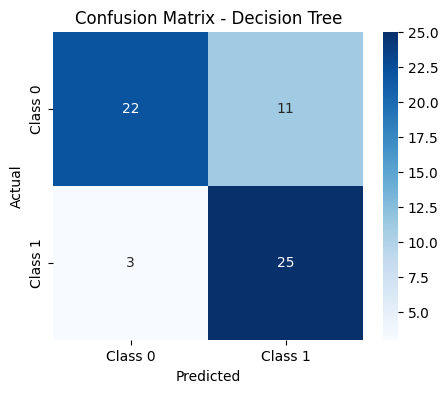

Training XGBoost...
XGBoost:
Accuracy: 0.8525
Confusion Matrix:
[[26  7]
 [ 2 26]]
ROC-AUC: 0.9188
              precision    recall  f1-score   support

           0       0.93      0.79      0.85        33
           1       0.79      0.93      0.85        28

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61





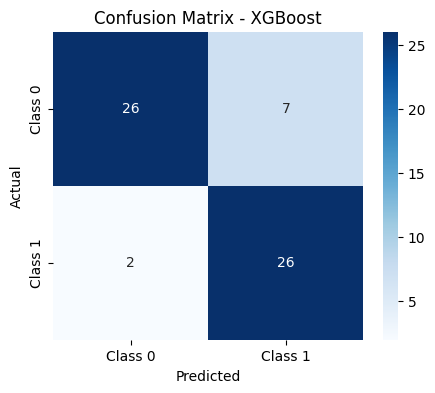

Training AdaBoost...
AdaBoost:
Accuracy: 0.8852
Confusion Matrix:
[[27  6]
 [ 1 27]]
ROC-AUC: 0.9437
              precision    recall  f1-score   support

           0       0.96      0.82      0.89        33
           1       0.82      0.96      0.89        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.89        61





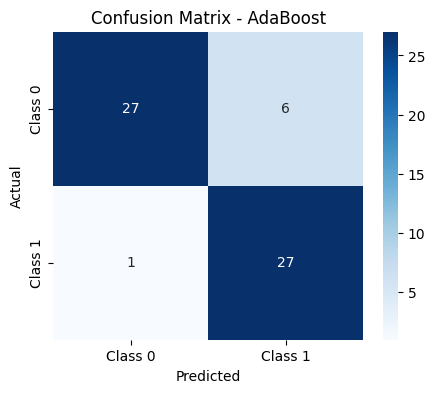

Summary of Results:
                       Model  Accuracy   ROC-AUC
0        Logistic Regression  0.868852  0.953463
1  Support Vector Classifier  0.852459  0.946970
2              Random Forest  0.901639  0.958874
3          Gradient Boosting  0.852459  0.945887
4                Naive Bayes  0.868852  0.949134
5        K-Nearest Neighbors  0.901639  0.924242
6              Decision Tree  0.770492  0.779762
7                    XGBoost  0.852459  0.918831
8                   AdaBoost  0.885246  0.943723


In [66]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix # Import confusion_matrix

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Classifier": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "AdaBoost": AdaBoostClassifier()
}

# Train and evaluate each classifier
results = []
for name, clf in classifiers.items():
    print(f"Training {name}...")
    # Train the classifier
    clf.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = clf.predict(X_test_scaled)
    y_prob = clf.predict_proba(X_test_scaled)[:, 1] if hasattr(clf, "predict_proba") else None

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store results
    results.append({"Model": name, "Accuracy": accuracy, "ROC-AUC": roc_auc})

    # Print metrics
    print(f"{name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    if y_prob is not None:
        print(f"ROC-AUC: {roc_auc:.4f}")
    print(classification_report(y_test, y_pred))
    print("\n" + "=" * 50 + "\n")

    # Plot confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Display summarized results
results_df = pd.DataFrame(results)
print("Summary of Results:")
print(results_df)
